# Step Function
Es una función de activación binaria que activa o desactiva la salida de una neurona (y) en función de un umbral (threshold): si el valor de entrada es mayor o igual al umbral, devuelve 1; si es menor, devuelve 0.

In [2]:
import torch

#Definimos la estructura minima de una neurona artificial (perceptron)
device = "cuda" if torch.cuda.is_available() else "cpu"

x = torch.tensor([ # 3 muestras, 2 características
    [2.0, 1.0],  
    [5.0, 1.0],  
    [1.0, 3.0]   
], device=device)

w = torch.tensor([[4.0], [-3.0]], device=device)
b = torch.tensor([-5.0], device=device)

y = x @ w + b # Producto punto + sesgo

# El producto sesgo seria:
# y1=(2.0)(4.0)+(1.0)(−3.0)+(−5.0)=8.0−3.0−5.0=0.0
# y2=(5.0)(4.0)+(1.0)(−3.0)+(−5.0)=20.0−3.0−5.0=12.0
# y3=(1.0)(4.0)+(3.0)(−3.0)+(−5.0)=4.0−9.0−5.0=−10.0

#Estariamos multiplicando cada caracteristica por su peso asociado y sumandole el sesgo.

print("y (pre-activación):\n", y) # Salida antes de la función de activación


y (pre-activación):
 tensor([[  0.],
        [ 12.],
        [-10.]], device='cuda:0')


In [ ]:
# === Step Function ===
def step_function(y):
    return torch.where(
        y >= 0, #Primer parametro: Generamos una condicion,es un if abstraido.
        #si se cumple devuelve el segundo parametro, si no el tercero

        torch.tensor(1.0, device=y.device), #Segundo parametro
        
        torch.tensor(0.0, device=y.device) #Tercer parametro
    )
# Aplicamos la función a la salida lineal
y_step = step_function(y)

print("Salida lineal (pre-activación):\n", y)
print("\nSalida tras Step Function:\n", y_step)


Salida lineal (pre-activación):
 tensor([[  0.],
        [ 12.],
        [-10.]], device='cuda:0')

Salida tras Step Function:
 tensor([[1.],
        [1.],
        [0.]], device='cuda:0')


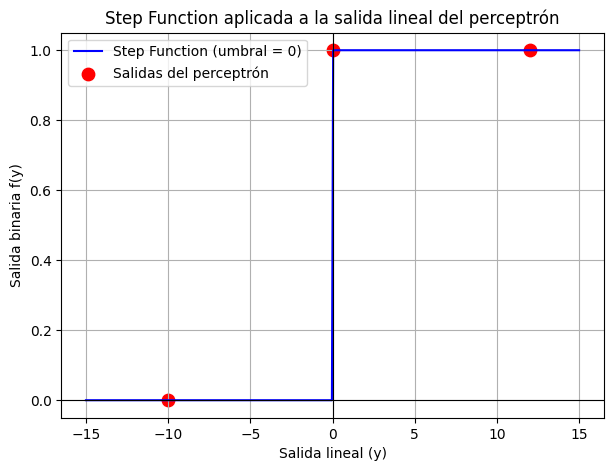

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Dibujamos la función escalón
x_plot = torch.linspace(-15, 15, 400)
y_plot = torch.where(x_plot >= 0, torch.tensor(1.0), torch.tensor(0.0))
plt.plot(x_plot.cpu(), y_plot.cpu(), label="Step Function (umbral = 0)", color="blue")

# Marcamos tus 3 salidas lineales y sus activaciones
plt.scatter(y.cpu(), y_step.cpu(), color="red", s=80, label="Salidas del perceptrón")

plt.title("Step Function aplicada a la salida lineal del perceptrón")
plt.xlabel("Salida lineal (y)")
plt.ylabel("Salida binaria f(y)")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.show()


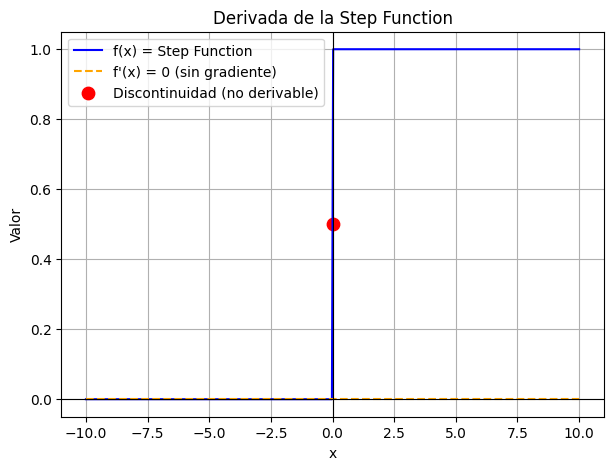

In [ ]:
x_plot = torch.linspace(-10, 10, 400)
y_plot = torch.where(x_plot >= 0, torch.tensor(1.0), torch.tensor(0.0))

# Derivada: 0 en todos los puntos excepto el salto
y_derivative = torch.zeros_like(x_plot)
# Visualmente marcamos el punto de salto
x_jump = 0
y_jump = 0.5  # solo para mostrar el salto en el gráfico

# === Gráfica ===
plt.figure(figsize=(7, 5))
plt.plot(x_plot.cpu(), y_plot.cpu(), label="f(x) = Step Function", color="blue")
plt.plot(x_plot.cpu(), y_derivative.cpu(), "--", label="f'(x) = 0 (sin gradiente)", color="orange")
plt.scatter(x_jump, y_jump, color="red", s=80, label="Discontinuidad (no derivable)")

plt.title("Derivada de la Step Function")
plt.xlabel("x")
plt.ylabel("Valor")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.show()

#La derivada es cero porque el salto entre 0 y 1 (0.0 a 1.0) es instantáneo.
# No hay definida una pendiente.